In [1]:
import pickle
import argparse
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Gangnam/graph_sensor_locations.csv')
df.index = df['index']
df = df.drop(columns=['index'])
idx_list = [96, 193, 192, 97, 369, 281, 98, 370, 282]

In [3]:
test_df = df.loc[idx_list]
latitude_list = []
for i in range(len(test_df)):
    latitude_list.append(test_df.iloc[i]['latitude'])

network = df[df['latitude'] == latitude_list[0]]
for i in range(1, len(latitude_list)):
    network = network.append(df[df['latitude'] == latitude_list[i]])
network

,sensor_id,latitude,longitude
index,,,
96,1220026200,37.507297,127.033812
114,1220029700,37.507297,127.033812
194,1220027200,37.507297,127.033812
196,1220028300,37.507297,127.033812
193,1220028200,37.508758,127.038464
197,1220029100,37.508758,127.038464
368,1220027400,37.508758,127.038464
386,1220029900,37.508758,127.038464
192,1220029000,37.510331,127.043832


In [4]:
direction = [
    's', 't', 'l', 'r',
    'l', 'r', 's', 't',
    'l', 'r', 's', 't',
    's', 't', 'l', 'r',
    's', 't', 'l', 'r',
    's', 't', 'l', 'r',
    's', 't', 'r', 'l',
    's', 't', 'r', 'l',
    's', 't', 'r', 'l'
] #manually script

network['dir'] = direction

int_sec = []
for i in range(9):
    for j in range(4):
        int_sec.append(i+1)
network['intersect'] = int_sec

network = network.sort_values(by=['intersect', 'dir'])
network = network.reset_index().drop(columns=['index'])
sensor_id_list = network['sensor_id'].values

network

,sensor_id,latitude,longitude,dir,intersect
0,1220027200,37.507297,127.033812,l,1
1,1220028300,37.507297,127.033812,r,1
2,1220026200,37.507297,127.033812,s,1
3,1220029700,37.507297,127.033812,t,1
4,1220028200,37.508758,127.038464,l,2
5,1220029100,37.508758,127.038464,r,2
6,1220027400,37.508758,127.038464,s,2
7,1220029900,37.508758,127.038464,t,2
8,1220029000,37.510331,127.043832,l,3
9,1220030100,37.510331,127.043832,r,3


In [5]:
distance = pd.read_csv('Gangnam/distances_gangnam.csv')
dist = pd.DataFrame(columns = ['from', 'to', 'cost'])

for i in range(len(distance)):
    data = distance.iloc[i]
    _from = data['from']
    _to = data['to']
    
    if(int(_from) in sensor_id_list) and (int(_to) in sensor_id_list):
        _from_int = network[network['sensor_id'] == _from.astype('int64')]['intersect']
        _to_int = network[network['sensor_id'] == _to.astype('int64')]['intersect']

        x = {'from': str(int(_from)), 'to': str(int(_to)), 'cost': data['cost'], 
            'from_int': str(int(_from_int)), 'to_int': str(int(_to_int))}
        dist = dist.append(x, ignore_index = True)
dist

,from,to,cost,from_int,to_int
0,1220026200,1220026200,0.000000,1,1
1,1220026200,1220022900,769.237889,1,4
2,1220026200,1220026300,769.237889,1,4
3,1220026200,1220024000,769.237889,1,4
4,1220026200,1220025300,769.237889,1,4
...,...,...,...,...,...
523,1220026900,1220024600,588.465301,6,5
524,1220026900,1220027500,588.465301,6,5
525,1220026900,1220025200,588.465301,6,5
526,1220026900,1220026100,588.465301,6,5


In [6]:
dir_list = ['tl', 'tr', 'bl', 'br']
for i in range(36, 72):
    data = network.iloc[i-36]
    
    virtual_node = {
        'sensor_id': '00' + str(data['intersect']) + '00' + str((i-36)%len(dir_list)),
        'latitude': data['latitude'],
        'longitude': data['longitude'],
        'dir': dir_list[(i-36)%len(dir_list)],
        'intersect': data['intersect']
    }
    
    network = network.append(virtual_node, ignore_index=True)
network = network.astype({'sensor_id': str})
network

,sensor_id,latitude,longitude,dir,intersect
0,1220027200,37.507297,127.033812,l,1
1,1220028300,37.507297,127.033812,r,1
2,1220026200,37.507297,127.033812,s,1
3,1220029700,37.507297,127.033812,t,1
4,1220028200,37.508758,127.038464,l,2
...,...,...,...,...,...
67,008003,37.498509,127.044659,br,8
68,009000,37.500543,127.050794,tl,9
69,009001,37.500543,127.050794,tr,9
70,009002,37.500543,127.050794,bl,9


In [7]:
speed = pd.read_csv('Gangnam/speed_gangnam_0.csv').drop(columns=['Unnamed: 0'])
speed = speed[network['sensor_id'].values[:36]]
realnodes = speed.columns

speed

,1220027200,1220028300,1220026200,1220029700,1220028200,1220029100,1220027400,1220029900,1220029000,1220030100,...,1220019800,1220023000,1220022200,1220023900,1220021400,1220024700,1220023800,1220025500,1220023100,1220025900
0,26.81,21.90,30.22,25.19,20.30,28.65,30.79,28.18,26.37,19.00,...,35.79,33.92,30.67,27.01,31.14,25.88,20.10,33.00,34.14,23.21
1,29.64,19.84,27.00,26.96,20.49,31.06,30.52,31.57,22.31,24.67,...,27.27,28.43,37.95,31.21,31.67,29.59,38.00,32.00,33.50,17.50
2,28.94,20.95,32.49,26.20,22.35,31.83,27.82,31.39,19.00,23.85,...,26.36,32.13,30.78,26.81,30.50,31.86,24.85,26.52,30.59,29.29
3,28.41,20.36,30.44,26.72,24.68,29.19,32.74,29.39,24.60,27.85,...,28.36,36.85,38.06,29.00,30.10,25.44,24.95,24.00,33.25,26.45
4,30.29,20.47,30.82,27.21,19.57,33.13,29.08,27.15,23.87,26.02,...,19.00,42.00,29.00,31.00,33.73,28.02,16.00,31.00,32.79,25.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,25.78,23.89,33.47,25.93,15.57,23.16,21.88,37.42,24.97,22.07,...,30.78,31.19,26.00,24.52,40.23,25.24,25.92,33.75,33.65,26.60
2876,27.20,23.04,33.22,28.45,14.22,25.27,23.90,36.46,24.42,20.99,...,29.18,26.26,28.22,19.00,32.95,23.81,26.76,24.54,30.02,28.92
2877,26.61,26.83,33.90,25.24,14.31,23.24,24.18,34.65,26.05,21.49,...,33.23,27.88,25.00,23.74,40.24,24.74,26.96,18.00,35.52,21.00
2878,27.83,28.97,31.51,28.05,14.21,26.31,25.17,32.84,25.08,21.82,...,33.36,28.83,30.86,24.44,39.29,33.94,25.88,27.54,36.36,30.36


In [8]:
for i in range(9):
    top = network.iloc[36 + i*4 - 33]
    bottom = network.iloc[36 + i*4 - 34]
    left = network.iloc[36 + i*4 - 36]
    right = network.iloc[36 + i*4 - 35]
    
    speed[network.iloc[36 + i*4 + 0]['sensor_id']] = (speed[top['sensor_id']].values + 
                                                 speed[left['sensor_id']].values) / 2
    speed[network.iloc[36 + i*4 + 1]['sensor_id']] = (speed[top['sensor_id']].values + 
                                                 speed[right['sensor_id']].values) / 2
    speed[network.iloc[36 + i*4 + 2]['sensor_id']] = (speed[bottom['sensor_id']].values + 
                                                 speed[left['sensor_id']].values) / 2
    speed[network.iloc[36 + i*4 + 3]['sensor_id']] = (speed[bottom['sensor_id']].values + 
                                                 speed[right['sensor_id']].values) / 2
    
speed

,1220027200,1220028300,1220026200,1220029700,1220028200,1220029100,1220027400,1220029900,1220029000,1220030100,...,007002,007003,008000,008001,008002,008003,009000,009001,009002,009003
0,26.81,21.90,30.22,25.19,20.30,28.65,30.79,28.18,26.37,19.00,...,28.805,29.395,28.275,26.445,30.905,29.075,21.655,28.105,27.120,33.570
1,29.64,19.84,27.00,26.96,20.49,31.06,30.52,31.57,22.31,24.67,...,25.410,29.355,33.770,30.400,34.810,31.440,27.750,24.750,35.750,32.750
2,28.94,20.95,32.49,26.20,22.35,31.83,27.82,31.39,19.00,23.85,...,25.210,27.875,31.320,29.335,30.640,28.655,27.070,27.905,27.720,28.555
3,28.41,20.36,30.44,26.72,24.68,29.19,32.74,29.39,24.60,27.85,...,27.100,28.180,31.750,27.220,34.080,29.550,25.700,25.225,29.100,28.625
4,30.29,20.47,30.82,27.21,19.57,33.13,29.08,27.15,23.87,26.02,...,20.920,26.090,28.510,29.510,31.365,32.365,20.955,28.455,24.395,31.895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,25.78,23.89,33.47,25.93,15.57,23.16,21.88,37.42,24.97,22.07,...,25.865,32.045,25.620,24.880,33.115,32.375,26.260,30.175,29.785,33.700
2876,27.20,23.04,33.22,28.45,14.22,25.27,23.90,36.46,24.42,20.99,...,26.540,27.590,26.015,21.405,30.585,25.975,27.840,26.730,28.390,27.280
2877,26.61,26.83,33.90,25.24,14.31,23.24,24.18,34.65,26.05,21.49,...,31.715,30.045,24.870,24.240,32.620,31.990,23.980,19.500,31.240,26.760
2878,27.83,28.97,31.51,28.05,14.21,26.31,25.17,32.84,25.08,21.82,...,29.170,30.095,32.400,29.190,35.075,31.865,28.120,28.950,31.120,31.950


In [9]:
def delete_node(arr, value):
    arr = np.delete(arr, np.where(arr == value))
    return arr

In [10]:
realnodes = np.array(realnodes)
realnodes = delete_node(realnodes, '1220027200')
realnodes = delete_node(realnodes, '1220028200')
realnodes = delete_node(realnodes, '1220027600')
realnodes = delete_node(realnodes, '1220026300')
realnodes = delete_node(realnodes, '1220024000')
realnodes = delete_node(realnodes, '1220023900')
realnodes = delete_node(realnodes, '1220025900')
realnodes

array(['1220028300', '1220026200', '1220029700', '1220029100',
       '1220027400', '1220029900', '1220029000', '1220030100',
       '1220031100', '1220025300', '1220022900', '1220025200',
       '1220026100', '1220024600', '1220027500', '1220026000',
       '1220026900', '1220025800', '1220027700', '1220020600',
       '1220022300', '1220019800', '1220023000', '1220022200',
       '1220021400', '1220024700', '1220023800', '1220025500',
       '1220023100'], dtype=object)

In [11]:
speed = speed.drop(columns=['1220027200', '1220028200', '1220027600', '1220024000',
                           '1220026300', '1220023900', '1220025900'])
speed = speed.drop(columns=['001000', '001002', '002000', '002002', '003002', '003003',
                           '004000', '004001', '004002', '008001', '008003', '009000', '009001'])

speed

,1220028300,1220026200,1220029700,1220029100,1220027400,1220029900,1220029000,1220030100,1220031100,1220025300,...,006002,006003,007000,007001,007002,007003,008000,008002,009002,009003
0,21.90,30.22,25.19,28.65,30.79,28.18,26.37,19.00,36.00,28.74,...,30.155,23.905,27.870,28.460,28.805,29.395,28.275,30.905,27.120,33.570
1,19.84,27.00,26.96,31.06,30.52,31.57,22.31,24.67,29.42,26.28,...,24.595,25.235,25.990,29.935,25.410,29.355,33.770,34.810,35.750,32.750
2,20.95,32.49,26.20,31.83,27.82,31.39,19.00,23.85,28.28,27.88,...,26.330,25.610,28.095,30.760,25.210,27.875,31.320,30.640,27.720,28.555
3,20.36,30.44,26.72,29.19,32.74,29.39,24.60,27.85,32.91,29.85,...,29.545,25.215,31.345,32.425,27.100,28.180,31.750,34.080,29.100,28.625
4,20.47,30.82,27.21,33.13,29.08,27.15,23.87,26.02,28.64,26.93,...,28.240,24.240,32.420,37.590,20.920,26.090,28.510,31.365,24.395,31.895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,23.89,33.47,25.93,23.16,21.88,37.42,24.97,22.07,25.35,20.59,...,25.325,23.595,26.070,32.250,25.865,32.045,25.620,33.115,29.785,33.700
2876,23.04,33.22,28.45,25.27,23.90,36.46,24.42,20.99,24.62,22.52,...,23.475,22.570,25.080,26.130,26.540,27.590,26.015,30.585,28.390,27.280
2877,26.83,33.90,25.24,23.24,24.18,34.65,26.05,21.49,26.85,22.32,...,25.420,22.750,29.040,27.370,31.715,30.045,24.870,32.620,31.240,26.760
2878,28.97,31.51,28.05,26.31,25.17,32.84,25.08,21.82,24.98,19.66,...,24.355,21.545,26.905,27.830,29.170,30.095,32.400,35.075,31.120,31.950


In [12]:
speed['001000'] = speed['001002'] = (speed['1220029700'].values + speed['1220028300'].values + 
                                     speed['1220026200'].values) / 3
speed['002000'] = speed['002002'] = (speed['1220029900'].values + speed['1220029100'].values + 
                                     speed['1220027400'].values) / 3
speed['003002'] = speed['003003'] = (speed['1220029000'].values + speed['1220030100'].values + 
                                     speed['1220031100'].values) / 3
speed['004000'] = speed['004001'] = speed['004002'] = (speed['1220025300'].values + 
                                                       speed['1220022900'].values) / 2
speed['008001'] = speed['008003'] = (speed['1220024700'].values + speed['1220022200'].values + 
                                     speed['1220021400'].values) / 3
speed['009000'] = speed['009001'] = (speed['1220023800'].values + speed['1220023100'].values + 
                                     speed['1220025500'].values) / 3

speed

,1220028300,1220026200,1220029700,1220029100,1220027400,1220029900,1220029000,1220030100,1220031100,1220025300,...,002002,003002,003003,004000,004001,004002,008001,008003,009000,009001
0,21.90,30.22,25.19,28.65,30.79,28.18,26.37,19.00,36.00,28.74,...,29.206667,27.123333,27.123333,32.670,32.670,32.670,29.230000,29.230000,29.080000,29.080000
1,19.84,27.00,26.96,31.06,30.52,31.57,22.31,24.67,29.42,26.28,...,31.050000,25.466667,25.466667,26.565,26.565,26.565,33.070000,33.070000,34.500000,34.500000
2,20.95,32.49,26.20,31.83,27.82,31.39,19.00,23.85,28.28,27.88,...,30.346667,23.710000,23.710000,33.855,33.855,33.855,31.046667,31.046667,27.320000,27.320000
3,20.36,30.44,26.72,29.19,32.74,29.39,24.60,27.85,32.91,29.85,...,30.440000,28.453333,28.453333,30.505,30.505,30.505,31.200000,31.200000,27.400000,27.400000
4,20.47,30.82,27.21,33.13,29.08,27.15,23.87,26.02,28.64,26.93,...,29.786667,26.176667,26.176667,33.465,33.465,33.465,30.250000,30.250000,26.596667,26.596667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,23.89,33.47,25.93,23.16,21.88,37.42,24.97,22.07,25.35,20.59,...,27.486667,24.130000,24.130000,27.220,27.220,27.220,30.490000,30.490000,31.106667,31.106667
2876,23.04,33.22,28.45,25.27,23.90,36.46,24.42,20.99,24.62,22.52,...,28.543333,23.343333,23.343333,30.070,30.070,30.070,28.326667,28.326667,27.106667,27.106667
2877,26.83,33.90,25.24,23.24,24.18,34.65,26.05,21.49,26.85,22.32,...,27.356667,24.796667,24.796667,29.565,29.565,29.565,29.993333,29.993333,26.826667,26.826667
2878,28.97,31.51,28.05,26.31,25.17,32.84,25.08,21.82,24.98,19.66,...,28.106667,23.960000,23.960000,26.470,26.470,26.470,34.696667,34.696667,29.926667,29.926667


In [13]:
virtualnodes = np.array(speed.columns[29:])
virtualnodes = np.sort(virtualnodes)
virtualnodes, len(virtualnodes)

(array(['001000', '001001', '001002', '001003', '002000', '002001',
        '002002', '002003', '003000', '003001', '003002', '003003',
        '004000', '004001', '004002', '004003', '005000', '005001',
        '005002', '005003', '006000', '006001', '006002', '006003',
        '007000', '007001', '007002', '007003', '008000', '008001',
        '008002', '008003', '009000', '009001', '009002', '009003'],
       dtype=object),
 36)

In [14]:
columns = np.concatenate([realnodes, virtualnodes])
columns, len(columns)

(array(['1220028300', '1220026200', '1220029700', '1220029100',
        '1220027400', '1220029900', '1220029000', '1220030100',
        '1220031100', '1220025300', '1220022900', '1220025200',
        '1220026100', '1220024600', '1220027500', '1220026000',
        '1220026900', '1220025800', '1220027700', '1220020600',
        '1220022300', '1220019800', '1220023000', '1220022200',
        '1220021400', '1220024700', '1220023800', '1220025500',
        '1220023100', '001000', '001001', '001002', '001003', '002000',
        '002001', '002002', '002003', '003000', '003001', '003002',
        '003003', '004000', '004001', '004002', '004003', '005000',
        '005001', '005002', '005003', '006000', '006001', '006002',
        '006003', '007000', '007001', '007002', '007003', '008000',
        '008001', '008002', '008003', '009000', '009001', '009002',
        '009003'], dtype=object),
 65)

In [15]:
speed = speed[columns]
speed

,1220028300,1220026200,1220029700,1220029100,1220027400,1220029900,1220029000,1220030100,1220031100,1220025300,...,007002,007003,008000,008001,008002,008003,009000,009001,009002,009003
0,21.90,30.22,25.19,28.65,30.79,28.18,26.37,19.00,36.00,28.74,...,28.805,29.395,28.275,29.230000,30.905,29.230000,29.080000,29.080000,27.120,33.570
1,19.84,27.00,26.96,31.06,30.52,31.57,22.31,24.67,29.42,26.28,...,25.410,29.355,33.770,33.070000,34.810,33.070000,34.500000,34.500000,35.750,32.750
2,20.95,32.49,26.20,31.83,27.82,31.39,19.00,23.85,28.28,27.88,...,25.210,27.875,31.320,31.046667,30.640,31.046667,27.320000,27.320000,27.720,28.555
3,20.36,30.44,26.72,29.19,32.74,29.39,24.60,27.85,32.91,29.85,...,27.100,28.180,31.750,31.200000,34.080,31.200000,27.400000,27.400000,29.100,28.625
4,20.47,30.82,27.21,33.13,29.08,27.15,23.87,26.02,28.64,26.93,...,20.920,26.090,28.510,30.250000,31.365,30.250000,26.596667,26.596667,24.395,31.895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,23.89,33.47,25.93,23.16,21.88,37.42,24.97,22.07,25.35,20.59,...,25.865,32.045,25.620,30.490000,33.115,30.490000,31.106667,31.106667,29.785,33.700
2876,23.04,33.22,28.45,25.27,23.90,36.46,24.42,20.99,24.62,22.52,...,26.540,27.590,26.015,28.326667,30.585,28.326667,27.106667,27.106667,28.390,27.280
2877,26.83,33.90,25.24,23.24,24.18,34.65,26.05,21.49,26.85,22.32,...,31.715,30.045,24.870,29.993333,32.620,29.993333,26.826667,26.826667,31.240,26.760
2878,28.97,31.51,28.05,26.31,25.17,32.84,25.08,21.82,24.98,19.66,...,29.170,30.095,32.400,34.696667,35.075,34.696667,29.926667,29.926667,31.120,31.950


In [18]:
org_speed = pd.read_csv('Gangnam/speed_gangnam_0.csv').drop(columns=['Unnamed: 0'])
org_speed = org_speed[network['sensor_id'].values[:36]]

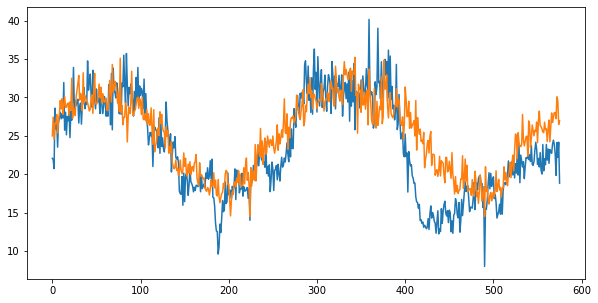

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.plot(org_speed['1220026300'].values[-576:])
target_value = (speed['004000'].values + speed['004001'].values) / 2
plt.plot(target_value[-576:])

In [27]:
true = org_speed['1220026300'].values[-576:]
pred = target_value[-576:]

def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 

from sklearn.metrics import mean_absolute_error, mean_squared_error 
mean_absolute_error(true, pred), np.sqrt(mean_squared_error(true, pred)), MAPE(true, pred)

(3.02203125, 3.9116342448237384, 15.23655521361031)

In [24]:
import copy

real_network = copy.deepcopy(network[:36])
virtual_network = copy.deepcopy(network[36:])

In [25]:
real_edge_list = []

for i in range(9):
    left = real_network.iloc[0 + i * 4]['sensor_id']
    right = real_network.iloc[1 + i * 4]['sensor_id']
    bottom = real_network.iloc[2 + i * 4]['sensor_id']
    top = real_network.iloc[3 + i * 4]['sensor_id']
    
    tl_edge = {'from': top, 'to': left, 'cost': 10.0}
    lt_edge = {'from': left, 'to': top, 'cost': 10.0}
    tr_edge = {'from': top, 'to': right, 'cost': 10.0}
    rt_edge = {'from': right, 'to': top, 'cost': 10.0}
    bl_edge = {'from': bottom, 'to': left, 'cost': 10.0}
    lb_edge = {'from': left, 'to': bottom, 'cost': 10.0}
    br_edge = {'from': bottom, 'to': right, 'cost': 10.0}
    rb_edge = {'from': right, 'to': bottom, 'cost': 10.0}
    tb_edge = {'from': top, 'to': bottom, 'cost': 10.0}
    bt_edge = {'from': bottom, 'to': top, 'cost': 10.0}
    lr_edge = {'from': left, 'to': right, 'cost': 10.0}
    rl_edge = {'from': right, 'to': left, 'cost': 10.0}
    
    tt_edge = {'from': top, 'to': top, 'cost': 0.0}
    rr_edge = {'from': right, 'to': right, 'cost': 0.0}
    ll_edge = {'from': left, 'to': left, 'cost': 0.0}
    bb_edge = {'from': bottom, 'to': bottom, 'cost': 0.0}
    
    real_edge_list.append(tl_edge)
    real_edge_list.append(lt_edge)
    real_edge_list.append(tr_edge)
    real_edge_list.append(rt_edge)
    real_edge_list.append(bl_edge)
    real_edge_list.append(lb_edge)
    real_edge_list.append(br_edge)
    real_edge_list.append(rb_edge)
    real_edge_list.append(tb_edge)
    real_edge_list.append(bt_edge)
    real_edge_list.append(lr_edge)
    real_edge_list.append(rl_edge)
    real_edge_list.append(tt_edge)
    real_edge_list.append(rr_edge)
    real_edge_list.append(ll_edge)
    real_edge_list.append(bb_edge)
real_edge_list

[{'from': '1220029700', 'to': '1220027200', 'cost': 10.0},
 {'from': '1220027200', 'to': '1220029700', 'cost': 10.0},
 {'from': '1220029700', 'to': '1220028300', 'cost': 10.0},
 {'from': '1220028300', 'to': '1220029700', 'cost': 10.0},
 {'from': '1220026200', 'to': '1220027200', 'cost': 10.0},
 {'from': '1220027200', 'to': '1220026200', 'cost': 10.0},
 {'from': '1220026200', 'to': '1220028300', 'cost': 10.0},
 {'from': '1220028300', 'to': '1220026200', 'cost': 10.0},
 {'from': '1220029700', 'to': '1220026200', 'cost': 10.0},
 {'from': '1220026200', 'to': '1220029700', 'cost': 10.0},
 {'from': '1220027200', 'to': '1220028300', 'cost': 10.0},
 {'from': '1220028300', 'to': '1220027200', 'cost': 10.0},
 {'from': '1220029700', 'to': '1220029700', 'cost': 0.0},
 {'from': '1220028300', 'to': '1220028300', 'cost': 0.0},
 {'from': '1220027200', 'to': '1220027200', 'cost': 0.0},
 {'from': '1220026200', 'to': '1220026200', 'cost': 0.0},
 {'from': '1220029900', 'to': '1220028200', 'cost': 10.0},
 

In [26]:
real_edge_list.remove({'from': '1220027200', 'to': '1220027200', 'cost': 0.0})
real_edge_list.remove({'from': '1220027200', 'to': '1220029700', 'cost': 10.0})
real_edge_list.remove({'from': '1220029700', 'to': '1220027200', 'cost': 10.0})
real_edge_list.remove({'from': '1220027200', 'to': '1220026200', 'cost': 10.0})
real_edge_list.remove({'from': '1220026200', 'to': '1220027200', 'cost': 10.0})
real_edge_list.remove({'from': '1220027200', 'to': '1220028300', 'cost': 10.0})
real_edge_list.remove({'from': '1220028300', 'to': '1220027200', 'cost': 10.0})

real_edge_list.remove({'from': '1220028200', 'to': '1220028200', 'cost': 0.0})
real_edge_list.remove({'from': '1220028200', 'to': '1220029900', 'cost': 10.0})
real_edge_list.remove({'from': '1220029900', 'to': '1220028200', 'cost': 10.0})
real_edge_list.remove({'from': '1220028200', 'to': '1220029100', 'cost': 10.0})
real_edge_list.remove({'from': '1220029100', 'to': '1220028200', 'cost': 10.0})
real_edge_list.remove({'from': '1220028200', 'to': '1220027400', 'cost': 10.0})
real_edge_list.remove({'from': '1220027400', 'to': '1220028200', 'cost': 10.0})

real_edge_list.remove({'from': '1220027600', 'to': '1220027600', 'cost': 0.0})
real_edge_list.remove({'from': '1220027600', 'to': '1220031100', 'cost': 10.0})
real_edge_list.remove({'from': '1220031100', 'to': '1220027600', 'cost': 10.0})
real_edge_list.remove({'from': '1220027600', 'to': '1220030100', 'cost': 10.0})
real_edge_list.remove({'from': '1220030100', 'to': '1220027600', 'cost': 10.0})
real_edge_list.remove({'from': '1220027600', 'to': '1220029000', 'cost': 10.0})
real_edge_list.remove({'from': '1220029000', 'to': '1220027600', 'cost': 10.0})

real_edge_list.remove({'from': '1220024000', 'to': '1220024000', 'cost': 0.0})
real_edge_list.remove({'from': '1220026300', 'to': '1220026300', 'cost': 0.0})
real_edge_list.remove({'from': '1220024000', 'to': '1220026300', 'cost': 10.0})
real_edge_list.remove({'from': '1220026300', 'to': '1220024000', 'cost': 10.0})
real_edge_list.remove({'from': '1220024000', 'to': '1220025300', 'cost': 10.0})
real_edge_list.remove({'from': '1220025300', 'to': '1220024000', 'cost': 10.0})
real_edge_list.remove({'from': '1220024000', 'to': '1220022900', 'cost': 10.0})
real_edge_list.remove({'from': '1220022900', 'to': '1220024000', 'cost': 10.0})
real_edge_list.remove({'from': '1220026300', 'to': '1220022900', 'cost': 10.0})
real_edge_list.remove({'from': '1220022900', 'to': '1220026300', 'cost': 10.0})
real_edge_list.remove({'from': '1220026300', 'to': '1220025300', 'cost': 10.0})
real_edge_list.remove({'from': '1220025300', 'to': '1220026300', 'cost': 10.0})

real_edge_list.remove({'from': '1220023900', 'to': '1220023900', 'cost': 0.0})
real_edge_list.remove({'from': '1220023900', 'to': '1220024700', 'cost': 10.0})
real_edge_list.remove({'from': '1220024700', 'to': '1220023900', 'cost': 10.0})
real_edge_list.remove({'from': '1220023900', 'to': '1220022200', 'cost': 10.0})
real_edge_list.remove({'from': '1220022200', 'to': '1220023900', 'cost': 10.0})
real_edge_list.remove({'from': '1220023900', 'to': '1220021400', 'cost': 10.0})
real_edge_list.remove({'from': '1220021400', 'to': '1220023900', 'cost': 10.0})

real_edge_list.remove({'from': '1220025900', 'to': '1220025900', 'cost': 0.0})
real_edge_list.remove({'from': '1220025900', 'to': '1220023800', 'cost': 10.0})
real_edge_list.remove({'from': '1220023800', 'to': '1220025900', 'cost': 10.0})
real_edge_list.remove({'from': '1220025900', 'to': '1220025500', 'cost': 10.0})
real_edge_list.remove({'from': '1220025500', 'to': '1220025900', 'cost': 10.0})
real_edge_list.remove({'from': '1220025900', 'to': '1220023100', 'cost': 10.0})
real_edge_list.remove({'from': '1220023100', 'to': '1220025900', 'cost': 10.0})

In [27]:
#Left - Right
real_edge_list.append({'from': '1220028300', 'to': '1220029100', 'cost': 441.323972})
real_edge_list.append({'from': '1220029100', 'to': '1220028300', 'cost': 441.323972})
real_edge_list.append({'from': '1220029100', 'to': '1220029000', 'cost': 504.734561})
real_edge_list.append({'from': '1220029000', 'to': '1220029100', 'cost': 504.734561})
real_edge_list.append({'from': '1220025300', 'to': '1220025200', 'cost': 553.587642})
real_edge_list.append({'from': '1220025200', 'to': '1220025300', 'cost': 553.587642})
real_edge_list.append({'from': '1220026100', 'to': '1220026000', 'cost': 588.465301})
real_edge_list.append({'from': '1220026000', 'to': '1220026100', 'cost': 588.465301})
real_edge_list.append({'from': '1220022300', 'to': '1220022200', 'cost': 566.517712})
real_edge_list.append({'from': '1220022200', 'to': '1220022300', 'cost': 566.517712})
real_edge_list.append({'from': '1220022200', 'to': '1220023800', 'cost': 586.582980})
real_edge_list.append({'from': '1220023800', 'to': '1220022200', 'cost': 586.582980})

#Top - Bottom
real_edge_list.append({'from': '1220026200', 'to': '1220022900', 'cost': 769.237889})
real_edge_list.append({'from': '1220022900', 'to': '1220026200', 'cost': 769.237889})
real_edge_list.append({'from': '1220022900', 'to': '1220023000', 'cost': 590.210453})
real_edge_list.append({'from': '1220023000', 'to': '1220022900', 'cost': 590.210453})
real_edge_list.append({'from': '1220027400', 'to': '1220027500', 'cost': 781.774840})
real_edge_list.append({'from': '1220027500', 'to': '1220027400', 'cost': 781.774840})
real_edge_list.append({'from': '1220024600', 'to': '1220024700', 'cost': 484.887242})
real_edge_list.append({'from': '1220024700', 'to': '1220024600', 'cost': 484.887242})
real_edge_list.append({'from': '1220031100', 'to': '1220027700', 'cost': 787.788717})
real_edge_list.append({'from': '1220027700', 'to': '1220031100', 'cost': 787.788717})
real_edge_list.append({'from': '1220025800', 'to': '1220023100', 'cost': 470.884550})
real_edge_list.append({'from': '1220023100', 'to': '1220025800', 'cost': 470.884550})

In [28]:
virtual_edge_list = []

for i in range(9):
    tl = virtual_network.iloc[0 + i * 4]['sensor_id']
    tr = virtual_network.iloc[1 + i * 4]['sensor_id']
    bl = virtual_network.iloc[2 + i * 4]['sensor_id']
    br = virtual_network.iloc[3 + i * 4]['sensor_id']
    
    left = real_network.iloc[0 + i * 4]['sensor_id']
    right = real_network.iloc[1 + i * 4]['sensor_id']
    bottom = real_network.iloc[2 + i * 4]['sensor_id']
    top = real_network.iloc[3 + i * 4]['sensor_id']
    
    ttl_edge = {'from': top, 'to': tl, 'cost': 10.0}
    tlt_edge = {'from': tl, 'to': top, 'cost': 10.0}
    tll_edge = {'from': tl, 'to': left, 'cost': 10.0}
    ltl_edge = {'from': left, 'to': tl, 'cost': 10.0}
    
    ttr_edge = {'from': top, 'to': tr, 'cost': 10.0}
    trt_edge = {'from': tr, 'to': top, 'cost': 10.0}
    trr_edge = {'from': tr, 'to': right, 'cost': 10.0}
    rtr_edge = {'from': right, 'to': tr, 'cost': 10.0}
    
    bbl_edge = {'from': bottom, 'to': bl, 'cost': 10.0}
    blb_edge = {'from': bl, 'to': bottom, 'cost': 10.0}
    bll_edge = {'from': bl, 'to': left, 'cost': 10.0}
    lbl_edge = {'from': left, 'to': bl, 'cost': 10.0}
    
    bbr_edge = {'from': bottom, 'to': br, 'cost': 10.0}
    brb_edge = {'from': br, 'to': bottom, 'cost': 10.0}
    brr_edge = {'from': br, 'to': right, 'cost': 10.0}
    rbr_edge = {'from': right, 'to': br, 'cost': 10.0}
    
    tlbr_edge = {'from': tl, 'to': br, 'cost': 10.0}
    brtl_edge = {'from': br, 'to': tl, 'cost': 10.0}
    trbl_edge = {'from': tr, 'to': bl, 'cost': 10.0}
    bltr_edge = {'from': bl, 'to': tr, 'cost': 10.0}
    
    tltl_edge = {'from': tl, 'to': tl, 'cost': 0.0}
    trtr_edge = {'from': tr, 'to': tr, 'cost': 0.0}
    blbl_edge = {'from': bl, 'to': bl, 'cost': 0.0}
    brbr_edge = {'from': br, 'to': br, 'cost': 0.0}
    
    virtual_edge_list.append(ttl_edge)
    virtual_edge_list.append(tlt_edge)
    virtual_edge_list.append(tll_edge)
    virtual_edge_list.append(ltl_edge)
    virtual_edge_list.append(ttr_edge)
    virtual_edge_list.append(trt_edge)
    virtual_edge_list.append(trr_edge)
    virtual_edge_list.append(rtr_edge)
    virtual_edge_list.append(bbl_edge)
    virtual_edge_list.append(blb_edge)
    virtual_edge_list.append(bll_edge)
    virtual_edge_list.append(lbl_edge)
    virtual_edge_list.append(bbr_edge)
    virtual_edge_list.append(brb_edge)
    virtual_edge_list.append(brr_edge)
    virtual_edge_list.append(rbr_edge)
    virtual_edge_list.append(tlbr_edge)
    virtual_edge_list.append(brtl_edge)
    virtual_edge_list.append(trbl_edge)
    virtual_edge_list.append(bltr_edge)
    virtual_edge_list.append(tltl_edge)
    virtual_edge_list.append(trtr_edge)
    virtual_edge_list.append(blbl_edge)
    virtual_edge_list.append(brbr_edge)
    
virtual_edge_list

[{'from': '1220029700', 'to': '001000', 'cost': 10.0},
 {'from': '001000', 'to': '1220029700', 'cost': 10.0},
 {'from': '001000', 'to': '1220027200', 'cost': 10.0},
 {'from': '1220027200', 'to': '001000', 'cost': 10.0},
 {'from': '1220029700', 'to': '001001', 'cost': 10.0},
 {'from': '001001', 'to': '1220029700', 'cost': 10.0},
 {'from': '001001', 'to': '1220028300', 'cost': 10.0},
 {'from': '1220028300', 'to': '001001', 'cost': 10.0},
 {'from': '1220026200', 'to': '001002', 'cost': 10.0},
 {'from': '001002', 'to': '1220026200', 'cost': 10.0},
 {'from': '001002', 'to': '1220027200', 'cost': 10.0},
 {'from': '1220027200', 'to': '001002', 'cost': 10.0},
 {'from': '1220026200', 'to': '001003', 'cost': 10.0},
 {'from': '001003', 'to': '1220026200', 'cost': 10.0},
 {'from': '001003', 'to': '1220028300', 'cost': 10.0},
 {'from': '1220028300', 'to': '001003', 'cost': 10.0},
 {'from': '001000', 'to': '001003', 'cost': 10.0},
 {'from': '001003', 'to': '001000', 'cost': 10.0},
 {'from': '001001'

In [29]:
virtual_edge_list.remove({'from': '1220027200', 'to': '001000', 'cost': 10.0})
virtual_edge_list.remove({'from': '001000', 'to': '1220027200', 'cost': 10.0})
virtual_edge_list.remove({'from': '1220027200', 'to': '001002', 'cost': 10.0})
virtual_edge_list.remove({'from': '001002', 'to': '1220027200', 'cost': 10.0})

virtual_edge_list.remove({'from': '1220028200', 'to': '002000', 'cost': 10.0})
virtual_edge_list.remove({'from': '002000', 'to': '1220028200', 'cost': 10.0})
virtual_edge_list.remove({'from': '1220028200', 'to': '002002', 'cost': 10.0})
virtual_edge_list.remove({'from': '002002', 'to': '1220028200', 'cost': 10.0})

virtual_edge_list.remove({'from': '1220027600', 'to': '003002', 'cost': 10.0})
virtual_edge_list.remove({'from': '003002', 'to': '1220027600', 'cost': 10.0})
virtual_edge_list.remove({'from': '1220027600', 'to': '003003', 'cost': 10.0})
virtual_edge_list.remove({'from': '003003', 'to': '1220027600', 'cost': 10.0})

virtual_edge_list.remove({'from': '1220024000', 'to': '004000', 'cost': 10.0})
virtual_edge_list.remove({'from': '004000', 'to': '1220024000', 'cost': 10.0})
virtual_edge_list.remove({'from': '1220024000', 'to': '004002', 'cost': 10.0})
virtual_edge_list.remove({'from': '004002', 'to': '1220024000', 'cost': 10.0})

virtual_edge_list.remove({'from': '1220026300', 'to': '004000', 'cost': 10.0})
virtual_edge_list.remove({'from': '004000', 'to': '1220026300', 'cost': 10.0})
virtual_edge_list.remove({'from': '1220026300', 'to': '004001', 'cost': 10.0})
virtual_edge_list.remove({'from': '004001', 'to': '1220026300', 'cost': 10.0})

virtual_edge_list.remove({'from': '1220023900', 'to': '008001', 'cost': 10.0})
virtual_edge_list.remove({'from': '008001', 'to': '1220023900', 'cost': 10.0})
virtual_edge_list.remove({'from': '1220023900', 'to': '008003', 'cost': 10.0})
virtual_edge_list.remove({'from': '008003', 'to': '1220023900', 'cost': 10.0})

virtual_edge_list.remove({'from': '1220025900', 'to': '009000', 'cost': 10.0})
virtual_edge_list.remove({'from': '009000', 'to': '1220025900', 'cost': 10.0})
virtual_edge_list.remove({'from': '1220025900', 'to': '009001', 'cost': 10.0})
virtual_edge_list.remove({'from': '009001', 'to': '1220025900', 'cost': 10.0})

virtual_edge_list.append({'from': '001000', 'to': '001002', 'cost': 10.0})
virtual_edge_list.append({'from': '001002', 'to': '001000', 'cost': 10.0})

virtual_edge_list.append({'from': '002000', 'to': '002002', 'cost': 10.0})
virtual_edge_list.append({'from': '002002', 'to': '002000', 'cost': 10.0})

virtual_edge_list.append({'from': '003002', 'to': '003003', 'cost': 10.0})
virtual_edge_list.append({'from': '003003', 'to': '003002', 'cost': 10.0})

virtual_edge_list.append({'from': '004000', 'to': '004001', 'cost': 10.0})
virtual_edge_list.append({'from': '004001', 'to': '004000', 'cost': 10.0})

virtual_edge_list.append({'from': '004000', 'to': '004002', 'cost': 10.0})
virtual_edge_list.append({'from': '004002', 'to': '004000', 'cost': 10.0})

virtual_edge_list.append({'from': '008001', 'to': '008003', 'cost': 10.0})
virtual_edge_list.append({'from': '008003', 'to': '008001', 'cost': 10.0})

virtual_edge_list.append({'from': '009000', 'to': '009001', 'cost': 10.0})
virtual_edge_list.append({'from': '009001', 'to': '009000', 'cost': 10.0})

In [30]:
virtual_edge_list.append({'from': '001001', 'to': '002000', 'cost': 441.323972})
virtual_edge_list.append({'from': '001001', 'to': '002002', 'cost': 441.323972})
virtual_edge_list.append({'from': '001003', 'to': '002000', 'cost': 441.323972})
virtual_edge_list.append({'from': '001003', 'to': '002002', 'cost': 441.323972})
virtual_edge_list.append({'from': '002000', 'to': '001001', 'cost': 441.323972})
virtual_edge_list.append({'from': '002002', 'to': '001001', 'cost': 441.323972})
virtual_edge_list.append({'from': '002000', 'to': '001003', 'cost': 441.323972})
virtual_edge_list.append({'from': '002002', 'to': '001003', 'cost': 441.323972})

virtual_edge_list.append({'from': '002001', 'to': '003000', 'cost': 504.734561})
virtual_edge_list.append({'from': '002001', 'to': '003002', 'cost': 504.734561})
virtual_edge_list.append({'from': '002003', 'to': '003000', 'cost': 504.734561})
virtual_edge_list.append({'from': '002003', 'to': '003002', 'cost': 504.734561})
virtual_edge_list.append({'from': '003000', 'to': '002001', 'cost': 504.734561})
virtual_edge_list.append({'from': '003002', 'to': '002001', 'cost': 504.734561})
virtual_edge_list.append({'from': '003000', 'to': '002003', 'cost': 504.734561})
virtual_edge_list.append({'from': '003002', 'to': '002003', 'cost': 504.734561})

virtual_edge_list.append({'from': '004001', 'to': '005000', 'cost': 553.587642})
virtual_edge_list.append({'from': '004001', 'to': '005002', 'cost': 553.587642})
virtual_edge_list.append({'from': '004003', 'to': '005000', 'cost': 553.587642})
virtual_edge_list.append({'from': '004003', 'to': '005002', 'cost': 553.587642})
virtual_edge_list.append({'from': '005000', 'to': '004001', 'cost': 553.587642})
virtual_edge_list.append({'from': '005002', 'to': '004001', 'cost': 553.587642})
virtual_edge_list.append({'from': '005000', 'to': '004003', 'cost': 553.587642})
virtual_edge_list.append({'from': '005002', 'to': '004003', 'cost': 553.587642})

virtual_edge_list.append({'from': '005001', 'to': '006000', 'cost': 588.465301})
virtual_edge_list.append({'from': '005001', 'to': '006002', 'cost': 588.465301})
virtual_edge_list.append({'from': '005003', 'to': '006000', 'cost': 588.465301})
virtual_edge_list.append({'from': '005003', 'to': '006002', 'cost': 588.465301})
virtual_edge_list.append({'from': '006000', 'to': '005001', 'cost': 588.465301})
virtual_edge_list.append({'from': '006002', 'to': '005001', 'cost': 588.465301})
virtual_edge_list.append({'from': '006000', 'to': '005003', 'cost': 588.465301})
virtual_edge_list.append({'from': '006002', 'to': '005003', 'cost': 588.465301})

virtual_edge_list.append({'from': '007001', 'to': '008000', 'cost': 566.517712})
virtual_edge_list.append({'from': '007001', 'to': '008002', 'cost': 566.517712})
virtual_edge_list.append({'from': '007003', 'to': '008000', 'cost': 566.517712})
virtual_edge_list.append({'from': '007003', 'to': '008002', 'cost': 566.517712})
virtual_edge_list.append({'from': '008000', 'to': '007001', 'cost': 566.517712})
virtual_edge_list.append({'from': '008002', 'to': '007001', 'cost': 566.517712})
virtual_edge_list.append({'from': '008000', 'to': '007003', 'cost': 566.517712})
virtual_edge_list.append({'from': '008002', 'to': '007003', 'cost': 566.517712})

virtual_edge_list.append({'from': '008001', 'to': '009000', 'cost': 586.582980})
virtual_edge_list.append({'from': '008001', 'to': '009002', 'cost': 586.582980})
virtual_edge_list.append({'from': '008003', 'to': '009000', 'cost': 586.582980})
virtual_edge_list.append({'from': '008003', 'to': '009002', 'cost': 586.582980})
virtual_edge_list.append({'from': '009000', 'to': '008001', 'cost': 586.582980})
virtual_edge_list.append({'from': '009002', 'to': '008001', 'cost': 586.582980})
virtual_edge_list.append({'from': '009000', 'to': '008003', 'cost': 586.582980})
virtual_edge_list.append({'from': '009002', 'to': '008003', 'cost': 586.582980})

In [31]:
virtual_edge_list.append({'from': '001002', 'to': '004000', 'cost': 769.237889})
virtual_edge_list.append({'from': '001002', 'to': '004001', 'cost': 769.237889})
virtual_edge_list.append({'from': '001003', 'to': '004000', 'cost': 769.237889})
virtual_edge_list.append({'from': '001003', 'to': '004001', 'cost': 769.237889})
virtual_edge_list.append({'from': '004000', 'to': '001002', 'cost': 769.237889})
virtual_edge_list.append({'from': '004001', 'to': '001002', 'cost': 769.237889})
virtual_edge_list.append({'from': '004000', 'to': '001003', 'cost': 769.237889})
virtual_edge_list.append({'from': '004001', 'to': '001003', 'cost': 769.237889})

virtual_edge_list.append({'from': '002002', 'to': '005000', 'cost': 781.774840})
virtual_edge_list.append({'from': '002002', 'to': '005001', 'cost': 781.774840})
virtual_edge_list.append({'from': '002003', 'to': '005000', 'cost': 781.774840})
virtual_edge_list.append({'from': '002003', 'to': '005001', 'cost': 781.774840})
virtual_edge_list.append({'from': '005000', 'to': '002002', 'cost': 781.774840})
virtual_edge_list.append({'from': '005001', 'to': '002002', 'cost': 781.774840})
virtual_edge_list.append({'from': '005000', 'to': '002003', 'cost': 781.774840})
virtual_edge_list.append({'from': '005001', 'to': '002003', 'cost': 781.774840})

virtual_edge_list.append({'from': '003002', 'to': '006000', 'cost': 787.788717})
virtual_edge_list.append({'from': '003002', 'to': '006001', 'cost': 787.788717})
virtual_edge_list.append({'from': '003003', 'to': '006000', 'cost': 787.788717})
virtual_edge_list.append({'from': '003003', 'to': '006001', 'cost': 787.788717})
virtual_edge_list.append({'from': '006000', 'to': '003002', 'cost': 787.788717})
virtual_edge_list.append({'from': '006001', 'to': '003002', 'cost': 787.788717})
virtual_edge_list.append({'from': '006000', 'to': '003003', 'cost': 787.788717})
virtual_edge_list.append({'from': '006001', 'to': '003003', 'cost': 787.788717})

virtual_edge_list.append({'from': '004002', 'to': '007000', 'cost': 590.210453})
virtual_edge_list.append({'from': '004002', 'to': '007001', 'cost': 590.210453})
virtual_edge_list.append({'from': '004003', 'to': '007000', 'cost': 590.210453})
virtual_edge_list.append({'from': '004003', 'to': '007001', 'cost': 590.210453})
virtual_edge_list.append({'from': '007000', 'to': '004002', 'cost': 590.210453})
virtual_edge_list.append({'from': '007001', 'to': '004002', 'cost': 590.210453})
virtual_edge_list.append({'from': '007000', 'to': '004003', 'cost': 590.210453})
virtual_edge_list.append({'from': '007001', 'to': '004003', 'cost': 590.210453})

virtual_edge_list.append({'from': '005002', 'to': '008000', 'cost': 484.887242})
virtual_edge_list.append({'from': '005002', 'to': '008001', 'cost': 484.887242})
virtual_edge_list.append({'from': '005003', 'to': '008000', 'cost': 484.887242})
virtual_edge_list.append({'from': '005003', 'to': '008001', 'cost': 484.887242})
virtual_edge_list.append({'from': '008000', 'to': '005002', 'cost': 484.887242})
virtual_edge_list.append({'from': '008001', 'to': '005002', 'cost': 484.887242})
virtual_edge_list.append({'from': '008000', 'to': '005003', 'cost': 484.887242})
virtual_edge_list.append({'from': '008001', 'to': '005003', 'cost': 484.887242})

virtual_edge_list.append({'from': '006002', 'to': '009000', 'cost': 470.884550})
virtual_edge_list.append({'from': '006002', 'to': '009001', 'cost': 470.884550})
virtual_edge_list.append({'from': '006003', 'to': '009000', 'cost': 470.884550})
virtual_edge_list.append({'from': '006003', 'to': '009001', 'cost': 470.884550})
virtual_edge_list.append({'from': '009000', 'to': '006002', 'cost': 470.884550})
virtual_edge_list.append({'from': '009001', 'to': '006002', 'cost': 470.884550})
virtual_edge_list.append({'from': '009000', 'to': '006003', 'cost': 470.884550})
virtual_edge_list.append({'from': '009001', 'to': '006003', 'cost': 470.884550})

In [32]:
real_edge = pd.DataFrame(real_edge_list)
real_edge

,from,to,cost
0,1220029700,1220028300,10.000000
1,1220028300,1220029700,10.000000
2,1220026200,1220028300,10.000000
3,1220028300,1220026200,10.000000
4,1220029700,1220026200,10.000000
...,...,...,...
116,1220024700,1220024600,484.887242
117,1220031100,1220027700,787.788717
118,1220027700,1220031100,787.788717
119,1220025800,1220023100,470.884550


In [33]:
virtual_edge = pd.DataFrame(virtual_edge_list)
virtual_edge

,from,to,cost
0,1220029700,001000,10.00000
1,001000,1220029700,10.00000
2,1220029700,001001,10.00000
3,001001,1220029700,10.00000
4,001001,1220028300,10.00000
...,...,...,...
293,006003,009001,470.88455
294,009000,006002,470.88455
295,009001,006002,470.88455
296,009000,006003,470.88455


In [34]:
aug_edge = pd.concat([real_edge, virtual_edge])
aug_edge

,from,to,cost
0,1220029700,1220028300,10.00000
1,1220028300,1220029700,10.00000
2,1220026200,1220028300,10.00000
3,1220028300,1220026200,10.00000
4,1220029700,1220026200,10.00000
...,...,...,...
293,006003,009001,470.88455
294,009000,006002,470.88455
295,009001,006002,470.88455
296,009000,006003,470.88455


In [35]:
sensor_ids = speed.columns.values
normalized_k = 0.1
distance_df = aug_edge

num_sensors = len(sensor_ids)
dist_mx = np.zeros((num_sensors, num_sensors), dtype=np.float32)
dist_mx[:] = np.inf

sensor_id_to_ind = {}
for i, sensor_id in enumerate(sensor_ids):
    sensor_id_to_ind[sensor_id] = i
    
for row in distance_df.values:
    if row[0] not in sensor_id_to_ind or row[1] not in sensor_id_to_ind:
        continue
    dist_mx[sensor_id_to_ind[row[0]], sensor_id_to_ind[row[1]]] = row[2]
    
distances = dist_mx[~np.isinf(dist_mx)].flatten()
std = distances.std()
adj_mx = np.exp(-np.square(dist_mx / std))

In [36]:
with open('missing_virtual_20per_adj.pkl', 'wb') as f:
    pickle.dump([sensor_ids, sensor_id_to_ind, adj_mx], f, protocol=2)
    
speed.to_csv('missing_virtual_20per_feature.csv')